# Same as progress.ipynb, except we use phonemes as well

In [1]:
# progress checking

# imports
from nemo.collections.tts.models import FastPitchModel
from nemo.collections.tts.models import HifiGanModel
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import torch
import numpy as np
import os

[NeMo W 2022-05-23 22:42:16 experimental:27] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [136]:
seed=100
# test = "Man darf sich nicht von anderen entmutigen lassen."
# test_id = "2edfc39c95ef247c6e39c929d122f4cc"
data_path="/github/datasets/openslr-95-german-neutral-tts/thorsten-de/wavs/"

# 5 test samples

# test = "Dieser Pilz ist zwar nicht giftig, aber ungenie\u00dfbar."
# test_id = "b1e9265fcc34a4d3691eb2c6921198a2"

# test = "Denn wir wollen nat\u00fcrlich nicht, dass durch die Einf\u00fchrung von Mindestlohn die Menschen, die heute eine Arbeit haben, vielleicht dann arbeitslos werden."
# test_id = "625fee42255c5524910b1461ea67472f"

# test = "Der Kostenvoranschlag schaut wie folgt aus."
# test_id = "a7deaaa56acc87bc0af428333f99280e"

# test = "Wie ist das Rezept f\u00fcr ein Bierbowle"
# test_id = "8cb57204a72a08b7cd51f7d1976f0d8a"

# test_id = "757f8af609039c1b842fd220486b6ebc"
# test = "Ja, selbstverst\u00e4ndlich! Das ist bei uns Standard."

# 5 val samples

# test = "Weshalb ist die Veredelung der Pflanzen \u00fcberhaupt notwendig?"
# test_id = "7c81f276eacc87c4e5482c2334a08171"

# test = "Hast du noch einen letzten Wunsch?"
# test_id = "fde9c0a1099210c03ac5de300fd478d6"

# test = "Der Veranstalter des Konzerts sieht dies naturgem\u00e4\u00df etwas anders."
# test_id = "29b18466bbbbbbac760c36d87ba2734c"

# test = "Kurzz\u00fcge halten hier."
# test_id = "21cb9b6bca12b97f8ba26e3a1829d18b"

test = "Diese Musiksammlung soll die Vielfalt des Lebens widerspiegeln."
test_id = "877d9f668a877713b48735f282af62ca"


In [137]:
def evaluate_spec_fastpitch_ckpt(spec_gen_model, v_model, test):
    with torch.no_grad():
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.enabled = True
        torch.backends.cudnn.benchmark = False
        parsed = spec_gen_model.parse(str_input=test, normalize=True)
        spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed)
        print(spectrogram.size()) # debug
    #     audio = vocoder_model.convert_spectrogram_to_audio(spec=spectrogram, sigma=0.8, denoise=True)
        audio = v_model.convert_spectrogram_to_audio(spec=spectrogram)

    spectrogram = spectrogram.to('cpu').numpy()[0]
    audio = audio.to('cpu').numpy()[0]
    audio = audio / np.abs(audio).max()
    return audio, spectrogram


In [138]:
root = "/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch"

# A: Fastpitch trained from scratch & HiFiGAN fine-tuned on german neutral TTS (openSLR)

## R5 Train fastpitch from scratch and eval on HiFiGAN pre-trained on English

In [139]:
# hfg_ngc="tts_hifigan"
# fastpitchckptsdir=root+"/R5priorckpts/"

In [140]:
# # load vocoder and spectrogram generator models
# vocoder_model = HifiGanModel.from_pretrained(hfg_ngc, strict=False).eval().cuda()



In [141]:
# # fastpitchmodelpaths = [os.path.abspath(os.path.join(fastpitchckptsdir, f)) for f in os.listdir(fastpitchckptsdir)]
# fastpitchmodelpaths = ["/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R5priorckpts/FastPitch--v_loss=0.7020-epoch=999-last.ckpt","/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R5priorckpts/FastPitch--v_loss=0.6961-epoch=309-last.ckpt"]
# fastpitchmodelpaths

In [142]:
# spec_gen_models = {path: FastPitchModel.load_from_checkpoint(checkpoint_path=path).eval().cuda() for path in fastpitchmodelpaths}

In [143]:
# list of old R5 checkpoints
# !ls {root}/R5priorckpts/

In [144]:
# %matplotlib inline

# # ckptpath = "/akshita/R5priorckpts/..."
# for ckptpath in spec_gen_models.keys():
#     print("predicting from fastpitch ckptpath "+ckptpath)
#     audio, spectrogram = evaluate_spec_fastpitch_ckpt(spec_gen_models[ckptpath], vocoder_model, test)

#     # visualize the spectrogram
#     if spectrogram is not None:
#         imshow(spectrogram, origin="lower")
#         plt.show()

#     # audio
#     print("original audio")
#     ipd.display(ipd.Audio(filename=data_path+test_id+".wav", rate=22050))
#     print("predicted audio")
#     ipd.display(ipd.Audio(audio, rate=22050))

### R6: fine-tune HiFiGAN on German, evluate with R5 Fastpitch (model A)

#### R61: HiFiGAN fine-tuned on predicted FastPitch mels at 309 & 999 epochs

In [145]:
# list available R6 models
!ls {root}/R6priorckpts/fastpitch309/ {root}/R6priorckpts/fastpitch999/

/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R6priorckpts/fastpitch309/:
'HifiGan21--val_loss=0.3704-epoch=89.ckpt'
'HifiGan21--val_loss=0.3710-epoch=109.ckpt'
'HifiGan21--val_loss=0.3712-epoch=69.ckpt'
'HifiGan21--val_loss=0.3713-epoch=189.ckpt'
'HifiGan21--val_loss=0.3714-epoch=119.ckpt'
'HifiGan21--val_loss=0.3732-epoch=199-last.ckpt'
'HifiGan21--val_loss=0.3824-epoch=9-last.ckpt'
'HifiGan21--val_loss=0.3824-epoch=9.ckpt'
 HifiGan21.nemo

/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R6priorckpts/fastpitch999/:
'HifiGan21--val_loss=0.3638-epoch=169.ckpt'
'HifiGan21--val_loss=0.3643-epoch=139.ckpt'
'HifiGan21--val_loss=0.3644-epoch=149.ckpt'
'HifiGan21--val_loss=0.3645-epoch=179.ckpt'
'HifiGan21--val_loss=0.3650-epoch=159.ckpt'
'HifiGan21--val_loss=0.3678-epoch=199-last.ckpt'
 HifiGan21.nemo


In [146]:
fastpitch_path = "/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R5priorckpts/FastPitch--v_loss=0.7020-epoch=999-last.ckpt"
hifiganmodelpaths = ["/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R6priorckpts/fastpitch999/HifiGan21--val_loss=0.3638-epoch=169.ckpt"]


In [147]:
# load spectrogram generator and vocoder models
if 'r2_vocoder_models' not in locals():
    r2_vocoder_models = {path: (HifiGanModel.restore_from(path).eval().cuda() if ".nemo" in path else HifiGanModel.load_from_checkpoint(checkpoint_path=path).eval().cuda()) for path in hifiganmodelpaths}
if 'r2_spec_gen_model' not in locals():
    r2_spec_gen_model = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_path).eval().cuda()


predicting from hifigan ckptpath /github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R6priorckpts/fastpitch999/HifiGan21--val_loss=0.3638-epoch=169.ckpt
torch.Size([1, 80, 382])


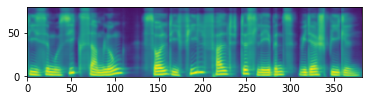

original audio


predicted audio


In [148]:
%matplotlib inline

for ckptpath in r2_vocoder_models.keys():
    print("predicting from hifigan ckptpath "+ckptpath)
    audio, spectrogram = evaluate_spec_fastpitch_ckpt(r2_spec_gen_model, r2_vocoder_models[ckptpath], test)

    # visualize the spectrogram
    if spectrogram is not None:
        imshow(spectrogram, origin="lower")
        plt.show()

    # audio
    print("original audio")
    ipd.display(ipd.Audio(data_path+test_id+'.wav', rate=22050))
    print("predicted audio")
    ipd.display(ipd.Audio(audio, rate=22050))

#### R22: HiFiGAN fine-tuned on target Mels

In [22]:
# # list available R22 models
# !ls /akshita/R22priorckpts

In [23]:
# fastpitch_path = "/akshita/R5priorckpts/FastPitch--v_loss=0.6961-epoch=309-last.ckpt"
# hifiganmodelpaths = ["/akshita/R22priorckpts/HifiGan22--val_loss=2.6570-epoch=9.ckpt"]

In [24]:
# # load spectrogram generator and vocoder models

# r22_spec_gen_model = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_path).eval().cuda()
# r22_vocoder_models = {path: (HifiGanModel.restore_from(path).eval().cuda() if ".nemo" in path else HifiGanModel.load_from_checkpoint(checkpoint_path=path).eval().cuda()) for path in hifiganmodelpaths}
                  

In [25]:
# %matplotlib inline

# for ckptpath in r22_vocoder_models.keys():
#     print("predicting from hifigan ckptpath "+ckptpath)
#     audio, spectrogram = evaluate_spec_fastpitch_ckpt(r22_spec_gen_model, r22_vocoder_models[ckptpath], test)

#     # visualize the spectrogram
#     if spectrogram is not None:
#         imshow(spectrogram, origin="lower")
#         plt.show()

#     # audio
#     print("original audio")
#     ipd.display(ipd.Audio(data_path+test_id+'.wav', rate=22050))
#     print("predicted audio")
#     ipd.display(ipd.Audio(audio, rate=22050))

# B: Fastpitch & HiFiGAN fine-tuned on german neutral TTS (openSLR)

## R7: Fastpitch_en finetuned on german dataset
## R8: HifiGan_en finetuned on Fastpitch predicted mels for german dataset

In [32]:
# list available R3 models
# !ls {root}/R7priorckpts {root}/R8priorckpts/

In [33]:
# fastpitchmodelpaths = ["/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R7priorckpts/FastPitch--v_loss=0.8811-epoch=24.ckpt", "/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R7priorckpts/FastPitch--v_loss=0.8705-epoch=49.ckpt", "/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R7priorckpts/FastPitch--v_loss=0.8720-epoch=124.ckpt"]
# # hfg_ngc="tts_hifigan"
# # R22 - finetuned on target mels OR R4
# hfg_ngc = "/github/ngc_workspace_backup/ngc_ws_tts_aagermanfastpitch/R8priorckpts/HifiGan4--val_loss=0.4059-epoch=199-last.ckpt"


In [34]:
# load vocoder and spectrogram generator models

# r34_spec_gen_models = {path: FastPitchModel.load_from_checkpoint(checkpoint_path=path).eval().cuda() for path in fastpitchmodelpaths}


In [35]:
# # vocoder_model = HifiGanModel.from_pretrained(hfg_ngc, strict=False).eval().cuda()
# r34_vocoder_model = HifiGanModel.load_from_checkpoint(checkpoint_path=hfg_ngc).eval().cuda()


In [36]:
# %matplotlib inline

# # ckptpath = "/akshita/R1priorckpts/..."
# for ckptpath in r34_spec_gen_models.keys():
#     print("predicting from fastpitch ckptpath "+ckptpath)
# #     audio, spectrogram = evaluate_spec_fastpitch_ckpt(r34_spec_gen_models[ckptpath], r34_vocoder_model, test)
#     audio, spectrogram = evaluate_spec_fastpitch_ckpt(r34_spec_gen_models[ckptpath], vocoder_model, test)

#     # visualize the spectrogram
#     if spectrogram is not None:
#         imshow(spectrogram, origin="lower")
#         plt.show()

#     # audio
#     print("original audio")
#     ipd.display(ipd.Audio(filename=data_path+test_id+".wav", rate=22050))
#     print("predicted audio")
#     ipd.display(ipd.Audio(audio, rate=22050))